Hello,

I have some questions for you that I need to be answered before the board meeting Morning morning. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.


1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed? 
8. Anything else I should be aware of?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import env
import acquire
import matplotlib.dates as mdates
import math
from sklearn import metrics
from random import randint
from matplotlib import style
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = acquire.prep_curriculum_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816192 entries, 0 to 900217
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        816192 non-null  object 
 1   time        816192 non-null  object 
 2   path        816192 non-null  object 
 3   user_id     816192 non-null  int64  
 4   cohort_id   816192 non-null  float64
 5   ip          816192 non-null  object 
 6   name        816192 non-null  object 
 7   start_date  816192 non-null  object 
 8   end_date    816192 non-null  object 
 9   created_at  816192 non-null  object 
 10  updated_at  816192 non-null  object 
 11  program_id  816192 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 81.0+ MB


In [4]:
# change dates to datetime format
df.start_date = pd.to_datetime(df.start_date)

In [5]:
df.end_date = pd.to_datetime(df.end_date)

In [6]:
df.date = pd.to_datetime(df.date)

In [9]:
df.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [10]:
df.describe()

,user_id,cohort_id,program_id
count,816192.000000,816192.000000,816192.000000
mean,479.434735,47.468642,1.959676
std,240.231177,34.995461,0.649419
min,1.000000,0.000000,0.000000
25%,303.000000,25.000000,2.000000
50%,491.000000,34.000000,2.000000
75%,671.000000,58.000000,2.000000
max,981.000000,139.000000,4.000000


In [105]:
# program_id 3 is data science
df.name[df.program_id==3].value_counts()

Darden      32015
Bayes       26538
Curie       21582
Easley      14715
Florence     8562
Name: name, dtype: int64

In [12]:
# create a separate df for ds cohorts

ds = df[df.program_id==3]
ds

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
326053,2019-08-20,09:39:58,/,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
326054,2019-08-20,09:39:59,/,467,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
326055,2019-08-20,09:39:59,/,468,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
326056,2019-08-20,09:40:02,/,469,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
326057,2019-08-20,09:40:08,/,470,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
900182,2021-04-21,16:14:16,regression/project,841,133.0,99.162.244.233,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0
900183,2021-04-21,16:15:51,regression/project,841,133.0,99.162.244.233,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0
900190,2021-04-21,16:23:53,/,143,133.0,173.174.194.60,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0
900191,2021-04-21,16:23:57,clustering/project,841,133.0,99.162.244.233,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0


In [13]:
# create a df for web dev

wd = df[df.program_id != 3]
wd

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
900210,2021-04-21,16:36:09,jquery/personal-site,869,135.0,136.50.98.51,Marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,2.0
900211,2021-04-21,16:36:34,html-css/css-ii/bootstrap-grid-system,948,138.0,104.48.214.211,Neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2.0
900212,2021-04-21,16:37:48,java-iii,834,134.0,67.11.50.23,Luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,2.0
900213,2021-04-21,16:38:14,java-iii/servlets,834,134.0,67.11.50.23,Luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,2.0


In [14]:
df.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816192 entries, 0 to 900217
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        816192 non-null  datetime64[ns]
 1   time        816192 non-null  object        
 2   path        816192 non-null  object        
 3   user_id     816192 non-null  int64         
 4   cohort_id   816192 non-null  float64       
 5   ip          816192 non-null  object        
 6   name        816192 non-null  object        
 7   start_date  816192 non-null  datetime64[ns]
 8   end_date    816192 non-null  datetime64[ns]
 9   created_at  816192 non-null  object        
 10  updated_at  816192 non-null  object        
 11  program_id  816192 non-null  float64       
dtypes: datetime64[ns](3), float64(2), int64(1), object(6)
memory usage: 81.0+ MB


In [16]:
df[df.created_at != df.updated_at]

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
72,2018-01-26,10:59:02,index.html,21,16.0,71.137.146.71,Niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,2.0
73,2018-01-26,10:59:06,java-i,21,16.0,71.137.146.71,Niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,2.0
254,2018-01-26,13:57:51,spring/extra-features/file-upload,40,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,2.0
1067,2018-01-29,09:28:24,jquery,40,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,2.0
1068,2018-01-29,09:28:31,jquery/ajax,40,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
897930,2021-04-20,11:37:32,spring/fundamentals/repositories,709,61.0,206.109.18.52,Bash,2020-07-20,2021-01-21,2020-07-20 19:04:00,2020-09-30 15:54:46,2.0
897971,2021-04-20,11:47:11,html-css,705,61.0,136.50.68.20,Bash,2020-07-20,2021-01-21,2020-07-20 19:04:00,2020-09-30 15:54:46,2.0
897972,2021-04-20,11:47:14,html-css/css-ii/bootstrap-grid-system,705,61.0,136.50.68.20,Bash,2020-07-20,2021-01-21,2020-07-20 19:04:00,2020-09-30 15:54:46,2.0
898429,2021-04-20,15:04:46,java-iii,609,56.0,70.115.90.106,Apex,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,2.0


In [17]:
df.path.nunique()

2141

In [18]:
df.path.value_counts(dropna=False).sort_values(ascending=False)

/                                                       43973
search/search_index.json                                18170
toc                                                     17386
javascript-i                                            17166
html-css                                                12351
                                                        ...  
interview-questions                                         1
interview                                                   1
RESTful-api                                                 1
content/examples/examples/gitbook/images/favicon.ico        1
11.02_TransformData.md                                      1
Name: path, Length: 2141, dtype: int64

In [19]:
df.path.value_counts()[df.path.value_counts()>10].tail(25)

regression/multivariate-regression-in-excel                   11
anomaly-detection/time-series-anomaly-detection-part-1        11
7-classification/handling-missing-values                      11
9-timeseries/4-prep                                           11
9-timeseries/5-explore                                        11
6-regression/multivariate-regression-in-excel                 11
12-distributed-ml/read-jdbc                                   11
appendix/testing-code                                         11
dataframes                                                    11
content/mysql/aliases-and-functions/functions.html            11
content/php_ii/array-functions/push-and-pop.html              11
uploads/5762c2946250b.jpg                                     11
content/jquery/resume-portfolio/gitbook/images/favicon.ico    11
1.10_JobReq_Indeed                                            11
cli-03-file-paths                                             11
objects                  

In [20]:
ds.path.value_counts()[ds.path.value_counts()>0].tail(25)

5-stats/4.2-compare-means/null                           1
appendix/cli/2-Overview                                  1
appendix/cls/2-listing-files                             1
misleading3_deaths.jpg                                   1
.gitignore                                               1
fundamentals/1-fundamentals/modern-data-scientist.jpg    1
appendix/interview-questions-students                    1
3-vocabulary                                             1
9-timeseries/6.1-parametric-modeling                     1
9-timeseries/6.2-prophet                                 1
12-distributed-ml/3-getting-started                      1
12-distributed-ml/4-acquire                              1
12-distributed-ml/5-inspect                              1
12-distributed-ml/6.1-prepare-part-1                     1
12-distributed-ml/6.2-prepare-part-2                     1
12-distributed-ml/6.3-prepare-part-3                     1
12-distributed-ml/6.4-prepare-part-4                    

In [21]:
wd.path.value_counts()[wd.path.value_counts()>5].tail(25)

7-classification/1-overview                                    6
10-anomaly-detection/4-detecting-timeseries-anomalies          6
content/laravel/intro/index.html                               6
9-timeseries/6.1-parametric-modeling                           6
Clustering_Explore                                             6
content/php_iv/exceptions/throwing.html                        6
content/mysql/basic-statements/gitbook/images/favicon.ico      6
13-advanced-topics/3.2-virtual-environments                    6
content/appendix/further-reading/gitbook/images/favicon.ico    6
6-regression/2-regression-excel                                6
passwords                                                      6
content/appendix/code-standards/mysql.html                     6
2-storytelling/3-tableau                                       6
1-fundamentals/2.3-visualization-with-excel                    6
content/mysql/relationships/joins.html                         6
control-statements-and-lo

In [30]:
ds.cohort_id.value_counts()

59.0     32015
34.0     26538
55.0     21582
133.0    14715
137.0     8562
Name: cohort_id, dtype: int64

In [23]:
df.cohort_id.nunique()

47

In [24]:
df.ip.value_counts()

97.105.19.58       260986
97.105.19.61        61662
192.171.117.210      9302
67.11.50.23          4181
172.124.67.93        3511
                    ...  
172.58.96.4             1
37.60.189.18            1
99.203.155.43           1
184.226.32.25           1
162.251.232.107         1
Name: ip, Length: 5284, dtype: int64

In [25]:
df.created_at = pd.to_datetime(df.created_at)

In [26]:
df.updated_at = pd.to_datetime(df.updated_at)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816192 entries, 0 to 900217
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        816192 non-null  datetime64[ns]
 1   time        816192 non-null  object        
 2   path        816192 non-null  object        
 3   user_id     816192 non-null  int64         
 4   cohort_id   816192 non-null  float64       
 5   ip          816192 non-null  object        
 6   name        816192 non-null  object        
 7   start_date  816192 non-null  datetime64[ns]
 8   end_date    816192 non-null  datetime64[ns]
 9   created_at  816192 non-null  datetime64[ns]
 10  updated_at  816192 non-null  datetime64[ns]
 11  program_id  816192 non-null  float64       
dtypes: datetime64[ns](5), float64(2), int64(1), object(4)
memory usage: 81.0+ MB


In [28]:
df = df.set_index(df.date).sort_index()

<AxesSubplot:xlabel='date'>

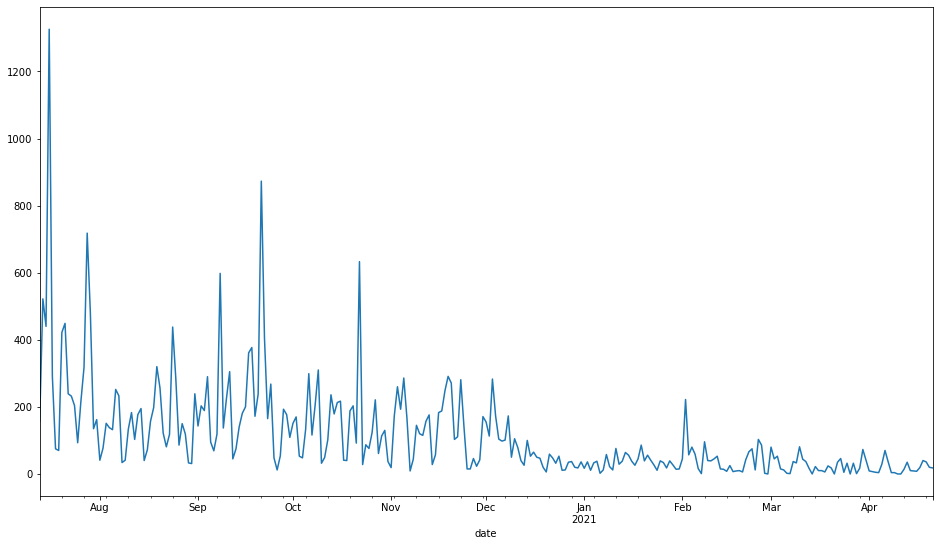

In [31]:
df[df.cohort_id==59].path.resample('d').count().plot(figsize=[16,9])

<AxesSubplot:xlabel='date'>

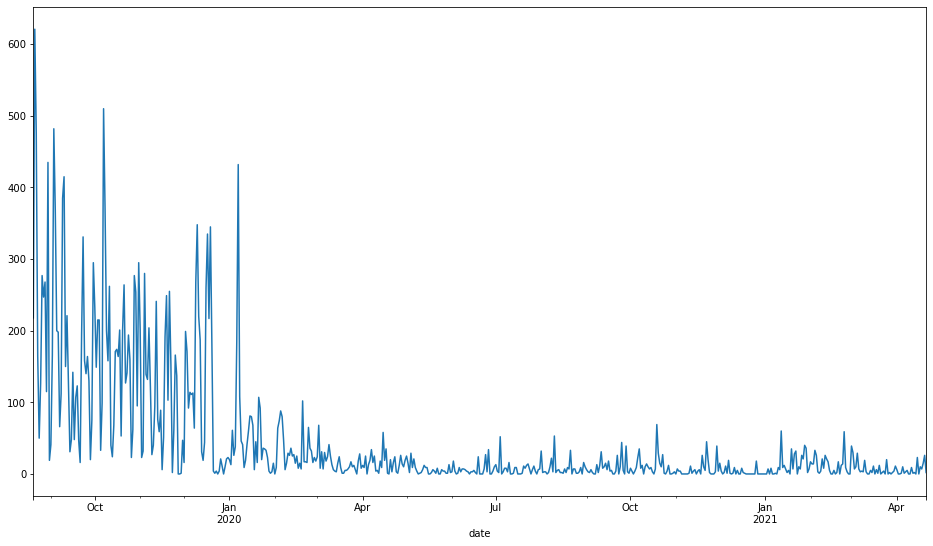

In [32]:
df[df.cohort_id==34].path.resample('d').count().plot(figsize=[16,9])

<AxesSubplot:xlabel='date'>

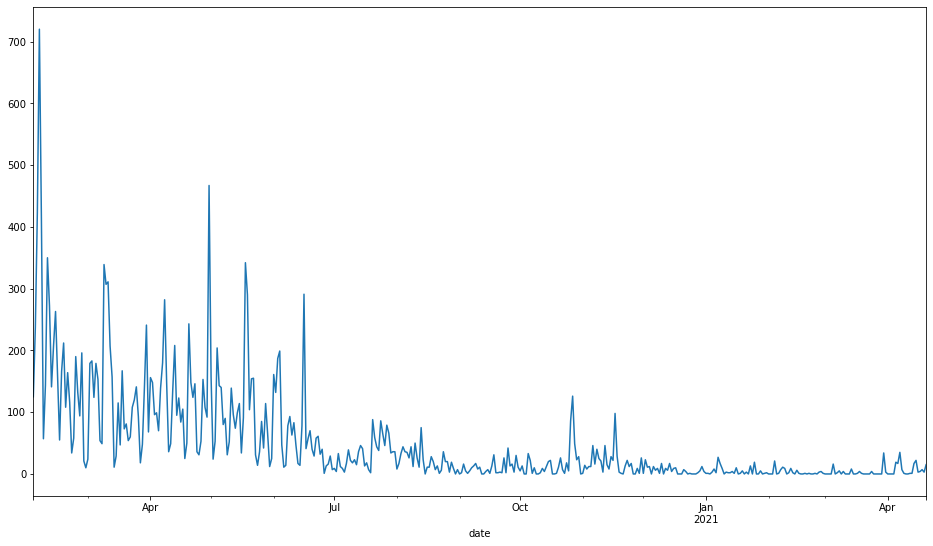

In [33]:
df[df.cohort_id==55].path.resample('d').count().plot(figsize=[16,9])

<AxesSubplot:xlabel='date'>

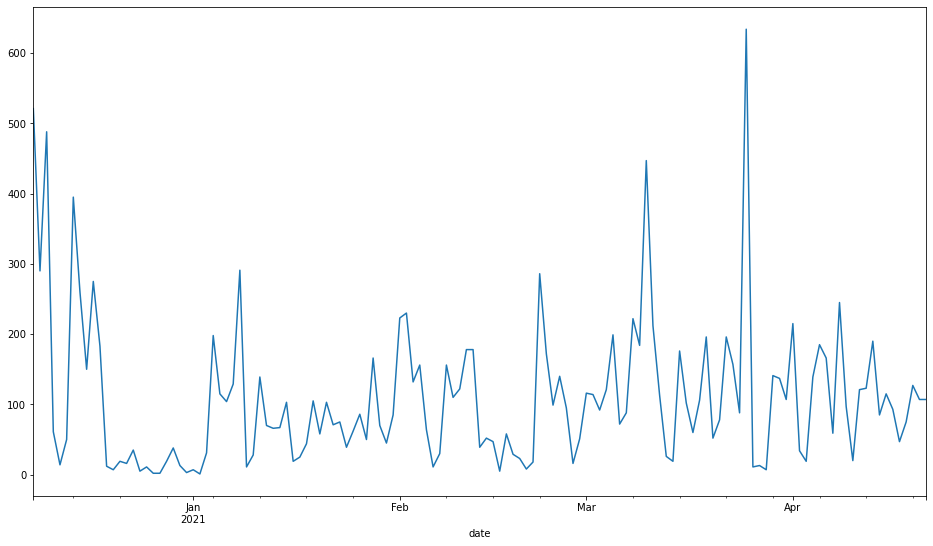

In [34]:
df[df.cohort_id==133].path.resample('d').count().plot(figsize=[16,9])

<AxesSubplot:xlabel='date'>

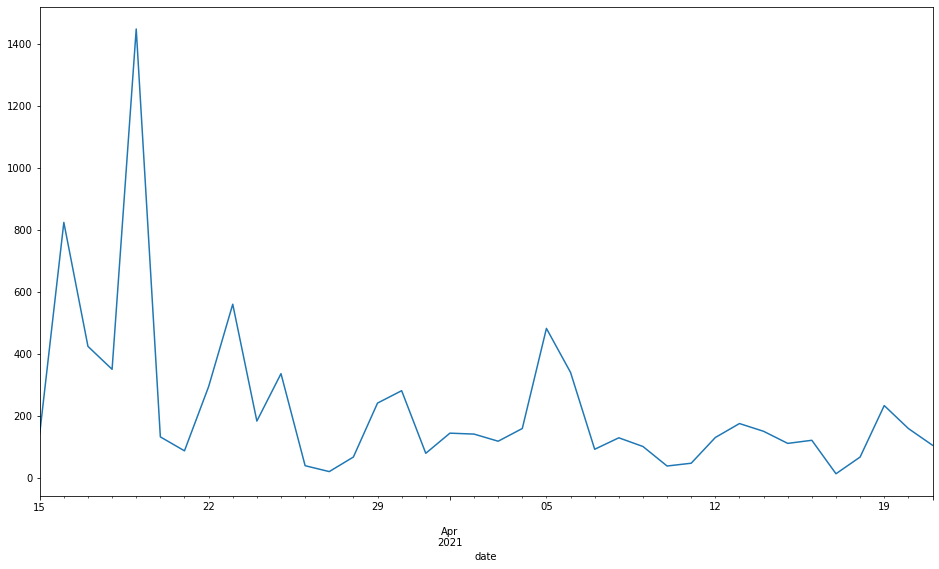

In [35]:
# this cohort's data is incomplete
df[df.cohort_id==137].path.resample('d').count().plot(figsize=[16,9])

In [36]:
df.groupby(['user_id','ip']).path.resample('m').count().idxmax()

(570, '172.124.67.93', Timestamp('2020-04-30 00:00:00'))

In [37]:
df.groupby('user_id').path.count().sort_values()

user_id
163       1
212       1
918       1
66        1
165       1
       ... 
64     3817
570    4584
344    5460
495    6451
53     8197
Name: path, Length: 957, dtype: int64

In [38]:
user_path_count = df.groupby('user_id').path.count()

In [39]:
# Calculate the z-score 
zscores = pd.Series((user_path_count - user_path_count.mean()) / user_path_count.std())

# Finds all of the observations three standard deviations or more
user_path_count[zscores.abs() >= 3]

user_id
53     8197
64     3817
344    5460
423    3804
495    6451
524    3512
555    3687
570    4584
581    3473
685    3522
Name: path, dtype: int64

In [40]:
#save ip_counts into separate dataframe
ip_df = pd.DataFrame(df.ip.value_counts(dropna=False)).reset_index().\
                rename(columns={'index':'ip','ip':'count'})
ip_df

,ip,count
0,97.105.19.58,260986
1,97.105.19.61,61662
2,192.171.117.210,9302
3,67.11.50.23,4181
4,172.124.67.93,3511
...,...,...
5279,172.58.96.4,1
5280,37.60.189.18,1
5281,99.203.155.43,1
5282,184.226.32.25,1


In [41]:
 ip_df['prob'] = df.ip.value_counts(normalize=True).reset_index().ip

In [42]:
ip_df.head()

,ip,count,prob
0,97.105.19.58,260986,0.319761
1,97.105.19.61,61662,0.075548
2,192.171.117.210,9302,0.011397
3,67.11.50.23,4181,0.005123
4,172.124.67.93,3511,0.004302


In [43]:
ip_df.ip.nunique()

5284

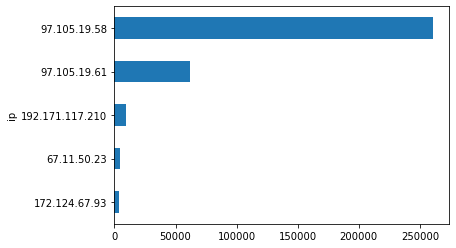

In [44]:
#plot them - top 5
ip_df.set_index('ip')['count'].head(5).sort_values().plot.barh()
plt.show()

In [49]:
#prob(B)
Pb = df.groupby('ip').size() / len(df)
Pb

ip
100.11.170.135     0.000140
100.19.73.35       0.000500
100.35.67.162      0.000013
103.137.12.164     0.000011
103.208.220.130    0.000001
                     ...   
99.97.208.154      0.000020
99.97.210.12       0.000022
99.98.32.165       0.000327
99.98.32.97        0.000056
99.98.36.168       0.000479
Length: 5284, dtype: float64

In [50]:
#prob(A & B)
Pab = df.groupby(['ip','user_id']).size() / len(df)
Pab

ip               user_id
100.11.170.135   658        0.000140
100.19.73.35     658        0.000500
100.35.67.162    52         0.000013
103.137.12.164   469        0.000011
103.208.220.130  369        0.000001
                              ...   
99.97.208.154    875        0.000006
99.97.210.12     606        0.000022
99.98.32.165     324        0.000327
99.98.32.97      481        0.000056
99.98.36.168     310        0.000479
Length: 7217, dtype: float64

In [51]:
Pab / Pb

ip               user_id
100.11.170.135   658        1.0000
100.19.73.35     658        1.0000
100.35.67.162    52         1.0000
103.137.12.164   469        1.0000
103.208.220.130  369        1.0000
                             ...  
99.97.208.154    875        0.3125
99.97.210.12     606        1.0000
99.98.32.165     324        1.0000
99.98.32.97      481        1.0000
99.98.36.168     310        1.0000
Length: 7217, dtype: float64

In [52]:
# Given a particular ip, what is probability of a certain status code
#same thing, diferent method, using groupby and normalizing value counts

user_ip = df.groupby('ip').user_id.value_counts(normalize=True).\
                rename('user_ip').reset_index()
user_ip.head()

,ip,user_id,user_ip
0,100.11.170.135,658,1.0
1,100.19.73.35,658,1.0
2,100.35.67.162,52,1.0
3,103.137.12.164,469,1.0
4,103.208.220.130,369,1.0


In [53]:
user_ip [user_ip.user_ip < 1]

,ip,user_id,user_ip
12,104.1.46.153,136,0.727273
13,104.1.46.153,244,0.272727
14,104.10.49.137,613,0.964958
15,104.10.49.137,594,0.032829
16,104.10.49.137,615,0.002213
...,...,...,...
7180,99.43.143.116,784,0.427382
7195,99.61.24.168,418,0.787546
7196,99.61.24.168,458,0.212454
7211,99.97.208.154,800,0.687500


In [54]:
df [df.ip == '104.10.49.137'].sort_values('user_id', 
                                           ascending=False)

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,,,
2020-03-21,2020-03-21,12:57:57,javascript-i/conditionals,615,56.0,104.10.49.137,Apex,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,2.0
2020-03-21,2020-03-21,13:43:18,search/search_index.json,615,56.0,104.10.49.137,Apex,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,2.0
2020-03-21,2020-03-21,13:36:29,javascript-i/functions,615,56.0,104.10.49.137,Apex,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,2.0
2020-03-21,2020-03-21,13:36:18,javascript-i/loops,615,56.0,104.10.49.137,Apex,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,2.0
2020-03-21,2020-03-21,13:36:12,javascript-i/testing-user-functions,615,56.0,104.10.49.137,Apex,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29,2020-02-29,21:16:31,html-css/elements,594,56.0,104.10.49.137,Apex,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,2.0
2020-02-29,2020-02-29,21:16:34,html-css/forms,594,56.0,104.10.49.137,Apex,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,2.0
2020-03-02,2020-03-02,20:13:52,html-css/css-i/positioning,594,56.0,104.10.49.137,Apex,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,2.0


In [55]:
df = df.merge(user_ip, how='left', on=['ip','user_id'])
df.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,user_ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,0.016477
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,0.016477
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,0.016477
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,0.016477
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,0.021115


In [56]:
df [df.user_ip < .01]

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,user_ip
9,2018-01-26,09:58:26,javascript-i/functions,4,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,0.007152
19,2018-01-26,10:02:21,javascript-i/functions,8,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,0.006146
20,2018-01-26,10:02:42,javascript-i/functions,9,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,0.009098
23,2018-01-26,10:08:22,mkdocs/search_index.json,10,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0,0.001962
24,2018-01-26,10:08:34,git/merge-conflict-demo,10,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0,0.001962
...,...,...,...,...,...,...,...,...,...,...,...,...,...
785883,2021-03-25,16:38:16,/,841,133.0,192.171.117.210,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,0.005590
785887,2021-03-25,16:39:07,anomaly-detection/overview,841,133.0,192.171.117.210,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,0.005590
785888,2021-03-25,16:39:08,anomaly-detection/AnomalyDetectionCartoon.jpeg,841,133.0,192.171.117.210,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,0.005590
785891,2021-03-25,16:40:22,regression/project,841,133.0,192.171.117.210,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,0.005590


In [57]:
df.program_id.value_counts()

2.0    629334
3.0    103412
0.0     52893
1.0     30548
4.0         5
Name: program_id, dtype: int64

In [58]:
#save ip_counts into separate dataframe
path_df = pd.DataFrame(df.path.value_counts(dropna=False)).reset_index().\
                rename(columns={'index':'path','path':'count'})
path_df

,path,count
0,/,43973
1,search/search_index.json,18170
2,toc,17386
3,javascript-i,17166
4,html-css,12351
...,...,...
2136,7.4.2-series,1
2137,5.04.05_Exercises,1
2138,one,1
2139,prework/cli/07-editing-files-with-vim,1


In [59]:
# remove root directory
path_df = path_df[path_df.path != '/']
path_df

,path,count
1,search/search_index.json,18170
2,toc,17386
3,javascript-i,17166
4,html-css,12351
5,java-iii,12340
...,...,...
2136,7.4.2-series,1
2137,5.04.05_Exercises,1
2138,one,1
2139,prework/cli/07-editing-files-with-vim,1


In [60]:
# remove json index path
path_df = path_df[path_df.path != 'search/search_index.json']
path_df

,path,count
2,toc,17386
3,javascript-i,17166
4,html-css,12351
5,java-iii,12340
6,java-ii,11425
...,...,...
2136,7.4.2-series,1
2137,5.04.05_Exercises,1
2138,one,1
2139,prework/cli/07-editing-files-with-vim,1


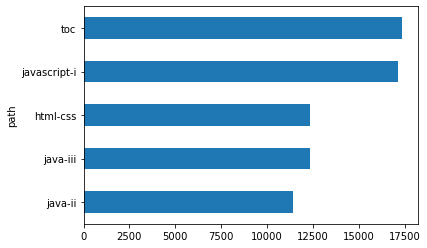

In [61]:
#plot them - top 5
path_df.set_index('path')['count'].head(5).sort_values().plot.barh()
plt.show()

In [62]:
#plot them - bottom 25
path_df.set_index('path')['count'].tail(5).sort_values() #.plot.barh(figsize=[16,9])
#plt.show()

path
7.4.2-series                             1
5.04.05_Exercises                        1
one                                      1
prework/cli/07-editing-files-with-vim    1
11.02_TransformData.md                   1
Name: count, dtype: int64

In [63]:
#prob(B)
Pb = df.groupby('path').size() / len(df)
Pb

path
0                                   0.000001
%20https://github.com/RaulCPena     0.000001
,%20https://github.com/RaulCPena    0.000001
.git                                0.000001
.gitignore                          0.000002
                                      ...   
web-dev-day-two                     0.000002
where                               0.000001
working-with-time-series-data       0.000017
wp-admin                            0.000001
wp-login                            0.000001
Length: 2141, dtype: float64

In [64]:
#prob(A & B)
Pab = df.groupby(['path','cohort_id']).size() / len(df)
Pab

path                              cohort_id
0                                 55.0         0.000001
%20https://github.com/RaulCPena   55.0         0.000001
,%20https://github.com/RaulCPena  55.0         0.000001
.git                              24.0         0.000001
.gitignore                        24.0         0.000001
                                                 ...   
web-dev-day-two                   61.0         0.000002
where                             137.0        0.000001
working-with-time-series-data     59.0         0.000017
wp-admin                          22.0         0.000001
wp-login                          22.0         0.000001
Length: 13274, dtype: float64

In [65]:
Pab / Pb

path                              cohort_id
0                                 55.0         1.0
%20https://github.com/RaulCPena   55.0         1.0
,%20https://github.com/RaulCPena  55.0         1.0
.git                              24.0         1.0
.gitignore                        24.0         0.5
                                              ... 
web-dev-day-two                   61.0         1.0
where                             137.0        1.0
working-with-time-series-data     59.0         1.0
wp-admin                          22.0         1.0
wp-login                          22.0         1.0
Length: 13274, dtype: float64

In [66]:
cohort_path = df.groupby('path').cohort_id.value_counts(normalize=True).\
                rename('cohort_path').reset_index()
cohort_path.head()

,path,cohort_id,cohort_path
0,0,55.0,1.0
1,%20https://github.com/RaulCPena,55.0,1.0
2,",%20https://github.com/RaulCPena",55.0,1.0
3,.git,24.0,1.0
4,.gitignore,24.0,0.5


In [67]:
cohort_path [cohort_path.cohort_path < 1]

,path,cohort_id,cohort_path
4,.gitignore,24.0,0.500000
5,.gitignore,59.0,0.500000
7,/,0.0,0.101403
8,/,59.0,0.067769
9,/,24.0,0.047779
...,...,...,...
13264,web-design/ux/purpose,18.0,0.004065
13265,web-design/ux/purpose,21.0,0.004065
13266,web-design/ux/purpose,24.0,0.004065
13267,web-design/ux/purpose,25.0,0.004065


In [68]:
cohort_path.path.value_counts().tail(25)

appendix/cli/2-overview                           1
appendix/cli/2-Overview                           1
appendix/cli                                      1
appendix/capstone/workbook                        1
appendix/capstone-workbook/project-proposal       1
appendix/capstone                                 1
appendix/further-reading/java/intellij            1
appendix/further-reading/java/intellij-tomcat     1
appendix/further-reading/javascript               1
appendix/open_data/www.census.gov                 1
appendix/spring/security-use-cases                1
appendix/spring/authorization                     1
appendix/professional-resume                      1
appendix/professional                             1
appendix/open_data/www.openstreetmap.org          1
appendix/open_data/www.flickr.com/services/api    1
appendix/job-search-workshop                      1
appendix/further-reading/mysq                     1
appendix/javascript                               1
appendix/jav

In [69]:
# df = df.merge(cohort_path, how='left', on=['path','cohort_id'])
# df.head()

## Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [70]:
path_by_cohort = df.groupby('cohort_id').path.value_counts().reset_index(name='counts')
path_by_cohort

,cohort_id,path,counts
0,0.0,/,4459
1,0.0,search/search_index.json,1985
2,0.0,javascript-i,780
3,0.0,toc,706
4,0.0,spring,641
...,...,...,...
13269,139.0,java-iii/servlets,1
13270,139.0,javascript-i/bom-and-dom/dom,1
13271,139.0,javascript-i/objects,1
13272,139.0,javascript-i/objects/math,1


In [71]:
path_by_cohort = path_by_cohort[path_by_cohort.cohort_id != 28]

In [72]:
path_by_cohort = path_by_cohort[path_by_cohort.path != '/']

<AxesSubplot:>

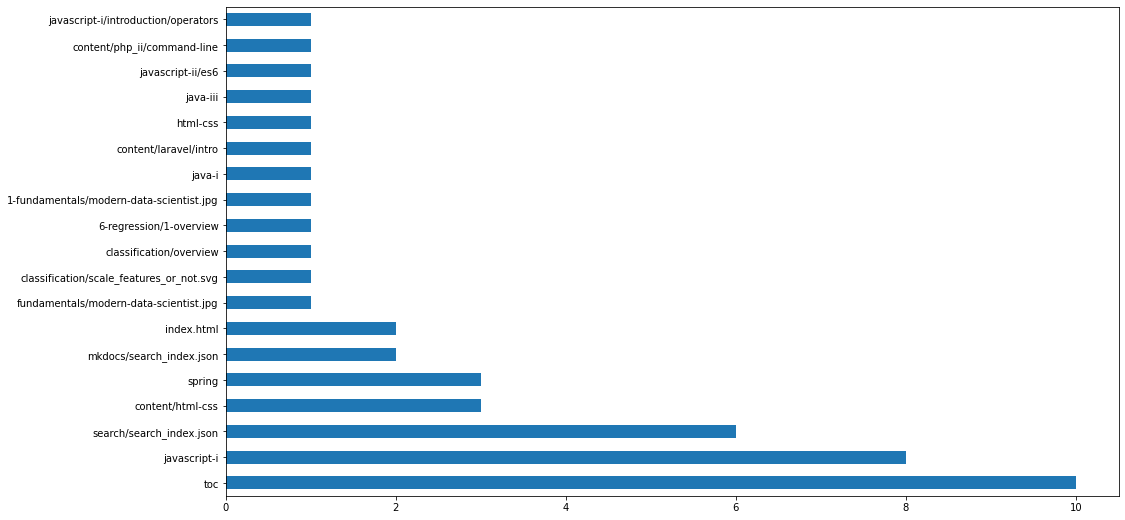

In [333]:
path_by_cohort.groupby('cohort_id').path.head(1).value_counts().plot.barh(figsize=[16,9])

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816192 entries, 0 to 816191
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        816192 non-null  datetime64[ns]
 1   time        816192 non-null  object        
 2   path        816192 non-null  object        
 3   user_id     816192 non-null  int64         
 4   cohort_id   816192 non-null  float64       
 5   ip          816192 non-null  object        
 6   name        816192 non-null  object        
 7   start_date  816192 non-null  datetime64[ns]
 8   end_date    816192 non-null  datetime64[ns]
 9   created_at  816192 non-null  datetime64[ns]
 10  updated_at  816192 non-null  datetime64[ns]
 11  program_id  816192 non-null  float64       
 12  user_ip     816192 non-null  float64       
dtypes: datetime64[ns](5), float64(3), int64(1), object(4)
memory usage: 87.2+ MB


<AxesSubplot:>

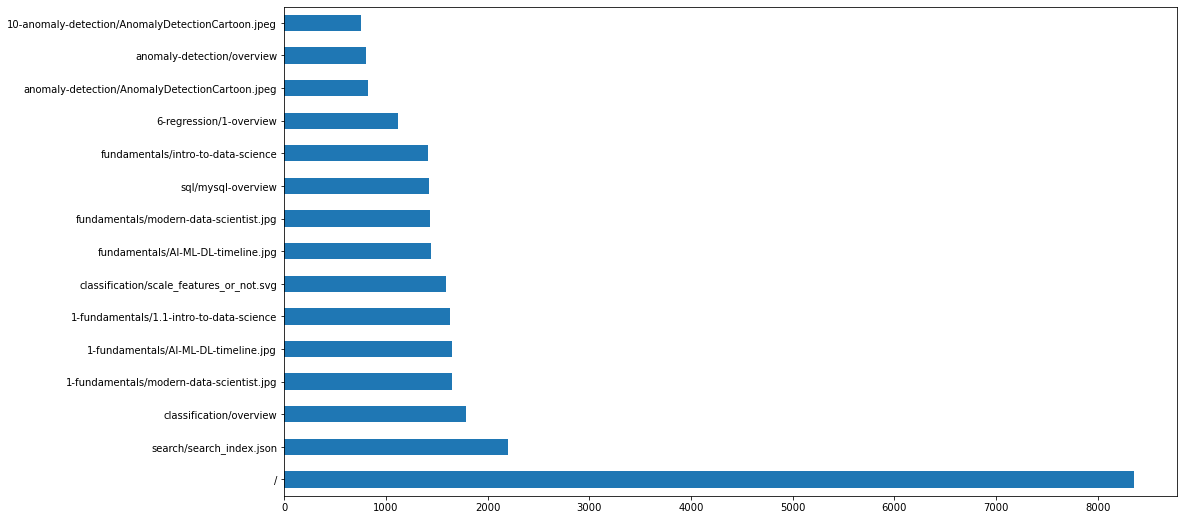

In [351]:
ds.path.value_counts().head(15).plot.barh(figsize=[16,9])

In [76]:
ds_path = ds[ds.path != '/']
ds_path

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
326064,2019-08-20,09:40:28,3-sql/1-mysql-overview,470,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
326067,2019-08-20,09:40:30,2-storytelling/bad-charts,467,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
326068,2019-08-20,09:40:30,2-storytelling/misleading1_baseball.jpg,467,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
326069,2019-08-20,09:40:30,2-storytelling/misleading1_fox.jpg,467,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
326070,2019-08-20,09:40:30,2-storytelling/misleading3_deaths.jpg,467,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
900152,2021-04-21,16:01:24,classification/project,841,133.0,99.162.244.233,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0
900182,2021-04-21,16:14:16,regression/project,841,133.0,99.162.244.233,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0
900183,2021-04-21,16:15:51,regression/project,841,133.0,99.162.244.233,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0
900191,2021-04-21,16:23:57,clustering/project,841,133.0,99.162.244.233,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0


In [77]:
ds_path.name.value_counts()

Darden      29035
Bayes       24571
Curie       19870
Easley      13600
Florence     7978
Name: name, dtype: int64

In [78]:
ds_path.groupby('cohort_id').path.head(1) #.value_counts().plot.barh(figsize=[16,9])

326064                3-sql/1-mysql-overview
445311                                 login
597057        13-advanced-topics/1-tidy-data
755221       python/data-types-and-variables
847096    fundamentals/intro-to-data-science
Name: path, dtype: object

<AxesSubplot:>

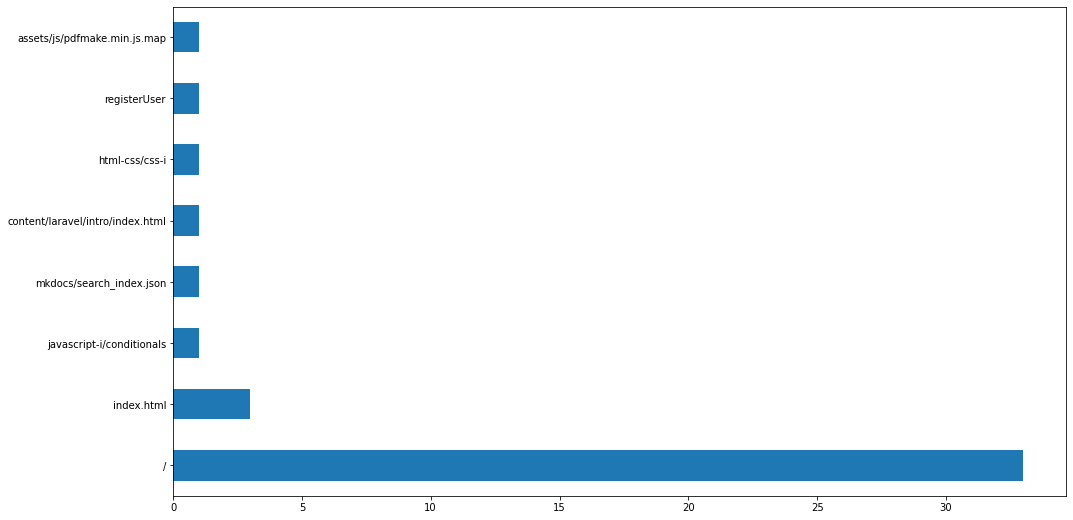

In [79]:
wd.groupby('cohort_id').path.head(1).value_counts().plot.barh(figsize=[16,9])

In [80]:
wd_path = wd[wd.path != '/']
wd_path

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
5,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
900210,2021-04-21,16:36:09,jquery/personal-site,869,135.0,136.50.98.51,Marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,2.0
900211,2021-04-21,16:36:34,html-css/css-ii/bootstrap-grid-system,948,138.0,104.48.214.211,Neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2.0
900212,2021-04-21,16:37:48,java-iii,834,134.0,67.11.50.23,Luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,2.0
900213,2021-04-21,16:38:14,java-iii/servlets,834,134.0,67.11.50.23,Luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,2.0


In [349]:
wd_path.path.value_counts().head(10)

toc                         17375
javascript-i                17156
search/search_index.json    15967
java-iii                    12336
html-css                    12335
java-ii                     11421
spring                      11115
jquery                      10604
mysql                       10129
java-i                      10003
Name: path, dtype: int64

<AxesSubplot:>

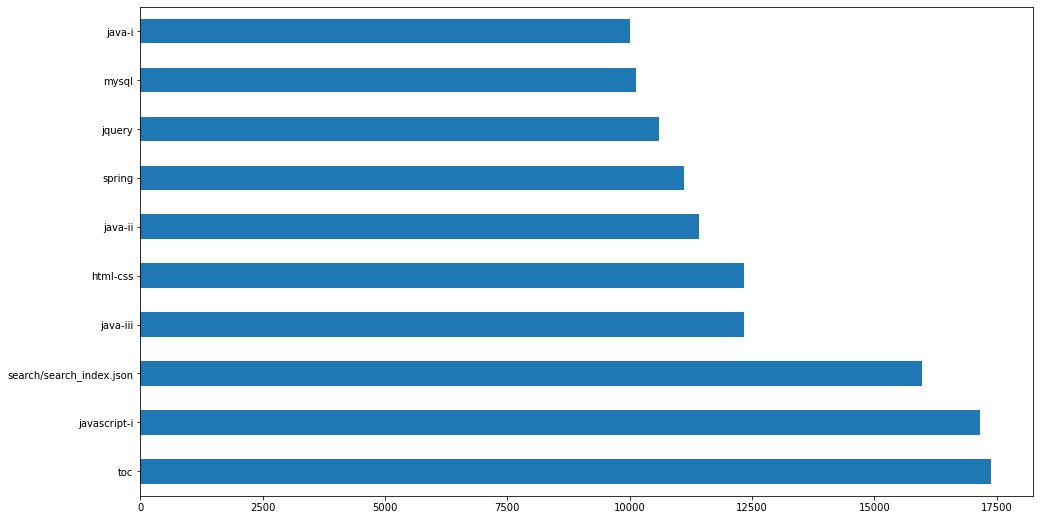

In [350]:
wd_path.path.value_counts().head(10).plot.barh(figsize=[16,9])

<AxesSubplot:>

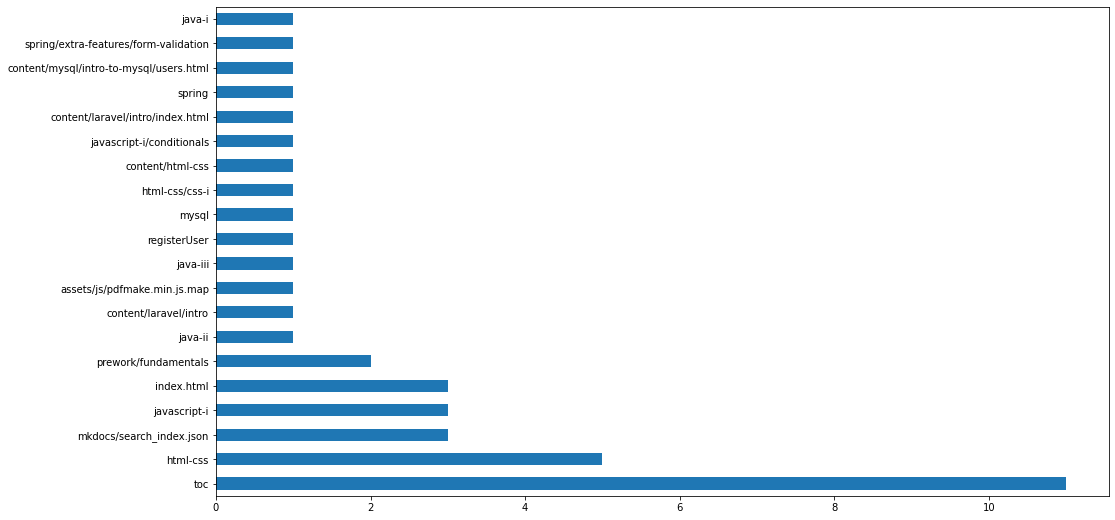

In [81]:
wd_path.groupby('cohort_id').path.value_counts().plot.barh(figsize=[16,9])

- Web Dev students access html-css and javascript-i most across all cohorts.

- Data Science students access fundamentals/intro-to-data-science and python/data-types-and-variables most across all cohorts.

## Which lessons do students access most after graduation?

In [84]:
# all cohorts
df.path[df.date > df.end_date].value_counts()

/                                     13643
search/search_index.json               4810
javascript-i                           3928
spring                                 3500
html-css                               2902
                                      ...  
6-regression/2-intro-to-regression        1
5-stats/1-descriptive-stats               1
interview                                 1
interview-questions                       1
content/control-structures-ii             1
Name: path, Length: 1736, dtype: int64

In [85]:
# data science cohorts
ds.path[ds.date > ds.end_date].value_counts()

/                                           1436
search/search_index.json                     493
sql/mysql-overview                           275
classification/overview                      266
classification/scale_features_or_not.svg     219
                                            ... 
DataToAction_v2.jpg                            1
advanced-topics/tidy-data                      1
10-anomaly-detection/isolation-forests         1
cli/moving-files                               1
individual-project/individual-project          1
Name: path, Length: 437, dtype: int64

In [353]:
ds.path[ds.date < ds.end_date].value_counts().head(10)

/                                           6912
search/search_index.json                    1710
1-fundamentals/modern-data-scientist.jpg    1527
1-fundamentals/AI-ML-DL-timeline.jpg        1524
classification/overview                     1518
1-fundamentals/1.1-intro-to-data-science    1506
classification/scale_features_or_not.svg    1370
fundamentals/AI-ML-DL-timeline.jpg          1254
fundamentals/modern-data-scientist.jpg      1251
fundamentals/intro-to-data-science          1229
Name: path, dtype: int64

In [86]:
wd.date = pd.to_datetime(wd.date)

In [87]:
wd.end_date = pd.to_datetime(wd.end_date)

In [88]:
# web dev cohorts
wd.path[wd.date > wd.end_date].value_counts().head(10)

/                           12207
search/search_index.json     4317
javascript-i                 3928
spring                       3499
html-css                     2902
java-iii                     2711
java-ii                      2687
java-i                       2666
javascript-ii                2421
toc                          2359
Name: path, dtype: int64

In [98]:
ds_series = ds.groupby('name').path.value_counts()

Darden      32015
Bayes       26538
Curie       21582
Easley      14715
Florence     8562

In [106]:
ds_series.Darden

path
/                                           2980
classification/overview                     1109
classification/scale_features_or_not.svg     943
sql/mysql-overview                           774
search/search_index.json                     664
                                            ... 
regression/least-angle-regression              1
regression/model_old                           1
regression/old_project                         1
regression/project/null                        1
scale_features_or_not.svg                      1
Name: path, Length: 420, dtype: int64

In [107]:
ds_series.Bayes

path
/                                           1967
1-fundamentals/modern-data-scientist.jpg     650
1-fundamentals/AI-ML-DL-timeline.jpg         648
1-fundamentals/1.1-intro-to-data-science     640
search/search_index.json                     588
                                            ... 
storytelling/refine                            1
storytelling/tableau                           1
tidy-data                                      1
timeseries/svr                                 1
viz.py                                         1
Name: path, Length: 533, dtype: int64

In [109]:
ds_series.Curie

path
/                                           1712
6-regression/1-overview                      595
search/search_index.json                     538
1-fundamentals/modern-data-scientist.jpg     467
1-fundamentals/AI-ML-DL-timeline.jpg         465
                                            ... 
storytelling/present                           1
storytelling/refine                            1
storytelling/tableau                           1
storytelling/understand                        1
timeseries/svr                                 1
Name: path, Length: 419, dtype: int64

In [110]:
ds_series.Easley

path
/                                                                1115
classification/scale_features_or_not.svg                          463
classification/overview                                           445
classification/classical_programming_vs_machine_learning.jpeg     432
fundamentals/AI-ML-DL-timeline.jpg                                381
                                                                 ... 
regression/model_old                                                1
stats/power-analysis                                                1
stats/sampling                                                      1
understand                                                          1
vocabulary                                                          1
Name: path, Length: 230, dtype: int64

In [111]:
ds_series.Florence

path
fundamentals/modern-data-scientist.jpg    627
fundamentals/AI-ML-DL-timeline.jpg        624
fundamentals/intro-to-data-science        615
/                                         584
python/data-types-and-variables           258
                                         ... 
stats/simulation                            1
storytelling/creating-charts                1
storytelling/overview                       1
timeseries/modeling-lesson2                 1
where                                       1
Name: path, Length: 162, dtype: int64

In [181]:
wd.name.value_counts().nunique()

41

In [164]:
wd = wd[wd.path!='/']

In [172]:
wd = wd[wd.path!='search/search_index.json']

In [176]:
wd = wd[wd.path!='toc']

In [177]:
wd_series = wd.groupby('name').path.value_counts()

In [178]:
wd_series['Zion']

path
javascript-i                 897
java-iii                     753
html-css                     675
spring                       672
javascript-ii                647
                            ... 
uploads/598dc43df39e2.jpg      1
web-design/intro               1
web-design/ui/visuals          1
web-design/ux/layout           1
web-design/ux/purpose          1
Name: path, Length: 314, dtype: int64

In [194]:
wd_series.sort_values(ascending=False).head(50)

name        path                    
Ceres       javascript-i                1003
Jupiter     javascript-i                 926
Hyperion    javascript-i                 910
Marco       javascript-i                 907
Zion        javascript-i                 897
Deimos      javascript-i                 896
Voyageurs   javascript-i                 884
Lassen      index.html                   877
Jupiter     java-iii                     795
Fortuna     java-iii                     786
            javascript-i                 785
Jupiter     html-css                     784
0           javascript-i                 780
Deimos      html-css                     773
Voyageurs   java-iii                     770
Ceres       html-css                     766
Ganymede    javascript-i                 760
Voyageurs   java-ii                      756
Jupiter     java-ii                      755
Zion        java-iii                     753
Teddy       spring                       744
Apex        html-c

In [199]:
wd[wd.path=='spring']['name'].value_counts()

Teddy         744
Zion          672
Voyageurs     650
0             641
Fortuna       636
Jupiter       621
Apex          600
Ceres         562
Deimos        533
Hyperion      526
Ganymede      508
Andromeda     487
Xanadu        454
Ulysses       409
Yosemite      381
Sequoia       364
Kalypso       339
Europa        324
Bash          311
Betelgeuse    299
Wrangell      293
Lassen        222
Arches        192
Luna           74
Niagara        65
Pinnacles      56
Marco          43
Hampton        43
Olympic        24
Mammoth        12
Quincy          8
Neptune         8
Ike             5
Kings           3
Franklin        2
Glacier         2
Oberon          2
Name: name, dtype: int64

In [200]:
wd[wd.path=='mysql']['name'].value_counts()

Voyageurs     663
Teddy         638
Ceres         622
Zion          605
Fortuna       591
Jupiter       564
Hyperion      553
Deimos        517
Xanadu        509
Ganymede      502
Apex          483
0             422
Kalypso       378
Europa        372
Ulysses       367
Andromeda     355
Betelgeuse    353
Yosemite      331
Wrangell      309
Bash          254
Luna          201
Sequoia       125
Lassen        105
Arches         95
Marco          42
Pinnacles      39
Olympic        32
Hampton        30
Niagara        24
Neptune        18
Quincy          9
Mammoth         8
Kings           5
Ike             4
Franklin        2
Glacier         2
Name: name, dtype: int64

In [201]:
wd[wd.path=='javascript-i']['name'].value_counts()

Ceres         1003
Jupiter        926
Hyperion       910
Marco          907
Zion           897
Deimos         896
Voyageurs      884
Fortuna        785
0              780
Ganymede       760
Xanadu         722
Betelgeuse     717
Luna           676
Apex           669
Kalypso        631
Teddy          615
Wrangell       560
Ulysses        526
Andromeda      516
Europa         506
Yosemite       452
Bash           374
Arches         294
Neptune        272
Lassen         233
Sequoia        202
Oberon         136
Olympic        128
Pinnacles       69
Hampton         36
Niagara         23
Kings           17
Glacier         11
Ike              7
Quincy           6
Mammoth          6
Franklin         2
Joshua           1
Badlands         1
Name: name, dtype: int64

In [206]:
wd[wd.name=='Badlands'].path.value_counts()

content/php_ii/command-line                                                     6
content/php_ii/command-line/io-streams.html                                     5
content/php_i                                                                   5
content/php_ii/control-structures-i                                             5
content/php_ii                                                                  4
content/php_i/intro-via-interactive-shell                                       3
prework/fundamentals                                                            2
javascript-ii/promises                                                          2
javascript-ii/map-filter-reduce                                                 2
html-css                                                                        2
content/php_i/intro-to-operators                                                2
content/php_i/types-and-variables-ii/intro-to-strings-continued.html            2
content/php_i/ty

In [210]:
df[df.path=='appendix'].name.value_counts()

Ganymede      561
Teddy         505
Apex          450
Jupiter       421
Ceres         411
Hyperion      400
Voyageurs     394
Fortuna       356
Deimos        343
Xanadu        325
Zion          296
0             245
Europa        243
Wrangell      209
Betelgeuse    188
Kalypso       180
Ulysses       176
Bash          174
Lassen        170
Sequoia       170
Andromeda     161
Yosemite      144
Arches        133
Luna           92
Marco          82
Hampton        55
Olympic        36
Pinnacles      25
Niagara        20
Neptune        15
Oberon         10
Mammoth         9
Quincy          6
Bayes           5
Ike             4
Kings           3
Franklin        1
Glacier         1
Darden          1
Name: name, dtype: int64

In [218]:
# ds students don't access the appendix?
ds.path.str.contains('appendix').value_counts()

False    99431
True      3980
Name: path, dtype: int64

In [220]:
ds.path[ds.date > ds.end_date].value_counts().head(20)

/                                                                1436
search/search_index.json                                          493
sql/mysql-overview                                                275
classification/overview                                           266
classification/scale_features_or_not.svg                          219
anomaly-detection/AnomalyDetectionCartoon.jpeg                    193
anomaly-detection/overview                                        191
fundamentals/AI-ML-DL-timeline.jpg                                189
fundamentals/modern-data-scientist.jpg                            187
fundamentals/intro-to-data-science                                184
1-fundamentals/modern-data-scientist.jpg                          127
1-fundamentals/AI-ML-DL-timeline.jpg                              126
1-fundamentals/1.1-intro-to-data-science                          126
6-regression/1-overview                                            86
sql/database-design 

In [223]:
wd.path[wd.date > wd.end_date].value_counts().head(20)

javascript-i                         3928
spring                               3499
html-css                             2902
java-iii                             2711
java-ii                              2687
java-i                               2666
javascript-ii                        2421
mysql                                2101
jquery                               2031
appendix                             2028
spring/fundamentals/controllers      1559
spring/setup                         1486
spring/fundamentals/views            1460
spring/fundamentals/repositories     1386
html-css/elements                    1285
index.html                           1167
html-css/introduction                1101
java-i/introduction-to-java          1083
javascript-i/javascript-with-html    1076
java-i/syntax-types-and-variables    1075
Name: path, dtype: int64

In [241]:
update_df = df[df.updated_at.dt.year==2019]

In [246]:
update_df = update_df[update_df.path!='/']

In [247]:
update_df = update_df[update_df.path!='toc']

In [256]:
update_df.groupby('name').path.value_counts().sort_values(ascending=False)

name        path                                                   
Ceres       search/search_index.json                                   1380
            javascript-i                                               1003
Zion        javascript-i                                                897
Deimos      javascript-i                                                896
            html-css                                                    773
                                                                       ... 
Betelgeuse  content/mysql/intro-to-mysql/gitbook/images/favicon.ico       1
            content/mysql/intro-to-mysql/tables.html                      1
            content/php_ii/control-structures-i/if-continued.html         1
            effects                                                       1
Zion        web-design/ux/purpose                                         1
Name: path, Length: 2392, dtype: int64

In [272]:
update_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205344 entries, 2019-01-20 23:18:57 to 2019-11-04 18:27:07
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        205344 non-null  datetime64[ns]
 1   time        205344 non-null  object        
 2   path        205344 non-null  object        
 3   user_id     205344 non-null  int64         
 4   cohort_id   205344 non-null  float64       
 5   ip          205344 non-null  object        
 6   name        205344 non-null  object        
 7   start_date  205344 non-null  datetime64[ns]
 8   end_date    205344 non-null  datetime64[ns]
 9   created_at  205344 non-null  datetime64[ns]
 10  program_id  205344 non-null  float64       
 11  user_ip     205344 non-null  float64       
dtypes: datetime64[ns](4), float64(3), int64(1), object(4)
memory usage: 20.4+ MB


In [ ]:
update_df = update_df.set_index('updated_at').sort_index()


In [ ]:
update_df.groupby('user_id','name').path.value_counts()

<AxesSubplot:ylabel='user_id'>

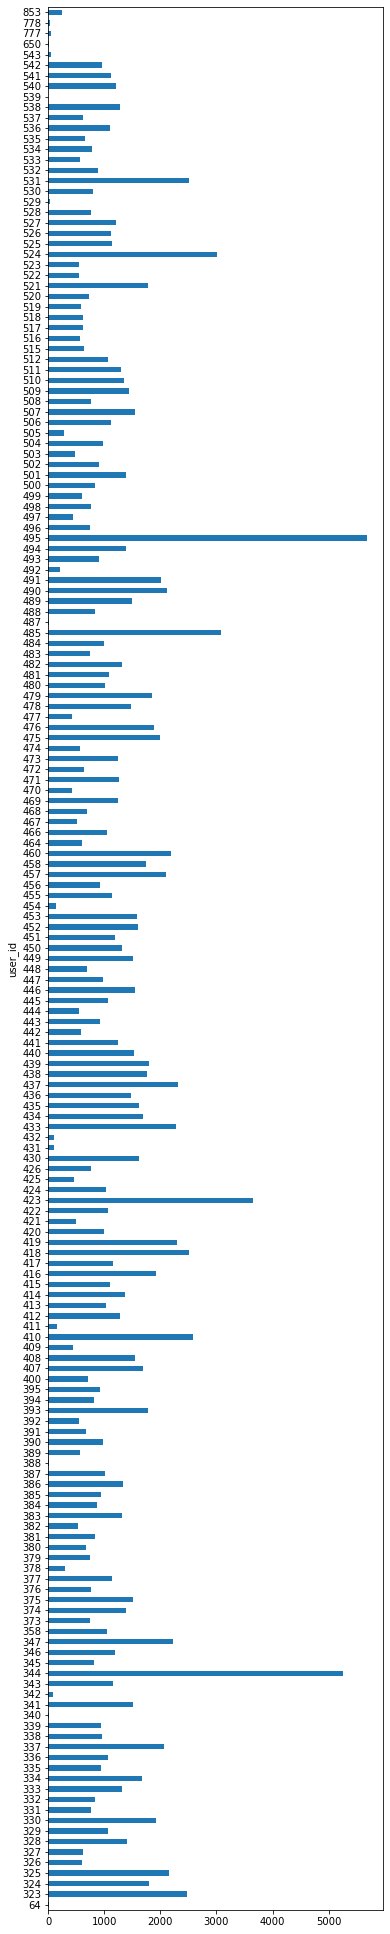

In [301]:
# count of access dates for each user_id in 2019
update_df.groupby('user_id').date.count().plot.barh(figsize=[6,35])

## Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [306]:
# access for low-engagement users
update_df.date[update_df.user_id==388].value_counts()

2019-03-19    7
Name: date, dtype: int64

In [307]:
update_df.date[update_df.user_id==432].value_counts()

2019-07-18    25
2019-07-15    25
2019-07-09    22
2019-07-12    13
2019-07-19     5
2019-07-25     4
2019-07-11     4
2019-07-16     4
2019-07-29     2
Name: date, dtype: int64

In [312]:
df.groupby('user_id').date.count().sort_values().head(25)

user_id
163    1
212    1
918    1
66     1
165    1
940    1
649    1
879    1
619    1
593    1
952    1
97     2
574    2
573    2
852    2
176    3
81     3
348    3
177    3
832    3
89     3
85     4
62     4
857    4
216    4
Name: date, dtype: int64

In [313]:
# user engagement by cohort and user_id
df.groupby('name').user_id.value_counts()

name  user_id
0     354        2965
      736        2358
      363        2248
      716        2136
      368        2085
                 ... 
Zion  332         868
      345         839
      326         768
      342         110
      340          18
Name: user_id, Length: 979, dtype: int64

In [323]:
df[df.user_id==411] #.date.value_counts()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,user_ip
263477,2019-05-29,10:01:36,/,411,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,0.000552
263501,2019-05-29,10:03:58,html-css,411,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,0.000552
263657,2019-05-29,12:00:36,html-css/introduction,411,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,0.000552
263706,2019-05-29,12:21:07,html-css/elements,411,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,0.000552
263940,2019-05-29,15:04:30,html-css,411,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,0.000552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284190,2019-07-10,08:17:18,html-css,411,32.0,65.43.113.131,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,1.000000
284191,2019-07-10,08:17:19,javascript-i,411,32.0,65.43.113.131,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,1.000000
284192,2019-07-10,08:17:20,javascript-ii,411,32.0,65.43.113.131,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,1.000000
289308,2019-07-17,13:45:09,html-css,411,32.0,65.43.113.131,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,1.000000


In [318]:
df[df.user_id==340].date.value_counts()

2019-01-22    18
Name: date, dtype: int64

In [317]:
df[df.user_id==454].date.value_counts()

2019-07-24    30
2019-07-25    26
2019-07-16    19
2019-07-18    19
2019-07-23    19
2019-07-19    17
2019-07-21    10
2019-07-20     4
2019-07-22     4
2019-07-17     3
2019-07-15     2
2019-07-26     2
Name: date, dtype: int64